In [2]:
# steps to train a model on the MNIST dataset
# 1. load the dataset
# 2. Look at the dataset
# 3. Prepare the dataset
# 4. Build the model
# 5. Train the model
# 6. Evaluate the model
# 7. Save the model

# 1. Load the dataset

In [1]:
# Imports
import numpy as np

In [2]:
# Variables
train_images = np.fromfile('train-images.idx3-ubyte', dtype=np.uint8)
train_labels = np.fromfile('train-labels.idx1-ubyte', dtype=np.uint8)
test_images = np.fromfile('t10k-images.idx3-ubyte', dtype=np.uint8)
test_labels = np.fromfile('t10k-labels.idx1-ubyte', dtype=np.uint8)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)



(47040016,)
(60008,)
(7840016,)
(10008,)


In [5]:
# Imports
import matplotlib.pyplot as plt

In [6]:
train_images

array([0, 0, 8, ..., 0, 0, 0], dtype=uint8)

# 2. Prepare the dataset

In [3]:
# Remove the header
train_images = train_images[16:].reshape(60000, 28, 28)
test_images = test_images[16:].reshape(10000, 28, 28)
train_labels = train_labels[8:].reshape(60000)
test_labels = test_labels[8:].reshape(10000)

# 3. Look at the dataset

In [8]:
# Imports
import matplotlib.pyplot as plt

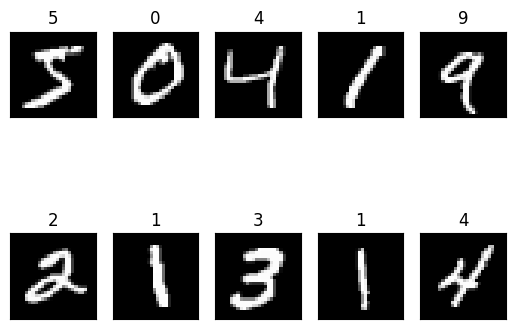

In [9]:
# Plot the first 10 images with their labels
for i in range(10):
    img = train_images[i]
    label = train_labels[i]
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
plt.show()

# 4. Build the model

In [10]:
# Imports
from sklearn.linear_model import LogisticRegression

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
# Label the variables
X_train = train_images.reshape(60000, 784)
X_test = test_images.reshape(10000, 784)
y_train = train_labels
y_test = test_labels

# 5. Train the model

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\Users\Ezelda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 6. Evaluate the model

In [14]:
# imports
from sklearn.metrics import accuracy_score

In [15]:
# make predictions
y_pred = clf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9255


In [17]:
# 1st model score
print("First model score with default parameters:", accuracy)

First model score with default parameters: 0.9255


In [18]:
# 1st model with tuned parameters
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_tuned_200 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_tuned_200)

Accuracy: 0.9224


c:\Users\Ezelda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print("Second model score with tuned parameters:", accuracy_tuned_200)

Second model score with tuned parameters: 0.9224


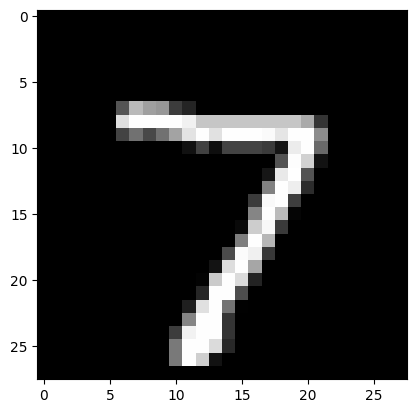

In [20]:
# get one image from the test set
img = test_images[0]

# plot the image
plt.imshow(img, cmap='gray')
plt.show()

In [21]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# Have the model predict the label
y_pred = clf.predict([img.reshape(784)]) # reshape the image to a 1D array
print("Predicted label:", y_pred[0]) # print the predicted label

Predicted label: 7


# Big Success

# 7. Save the model

In [ ]:
# Imports
import joblib

In [ ]:
# Save the model to a file
joblib.dump(clf, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# Extra models to be trained for evaluation

In [ ]:
"""

1. **Logistic Regression** DONE
score = 0.9255

2. **Decision Tree Classifier**
```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
```

3. **Random Forest Classifier**
```python
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
```

4. **Support Vector Machine (SVM)**
```python
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
```

5. **K-Nearest Neighbors (KNN)**
```python
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
```

"""